In [1]:
import napari
from skimage import data
import numpy as np
from skimage import io

In [2]:
# sets image name and loads it
path = "/home/marcnol/grey/users/marcnol/deconwolf-test/"
file = path + "C2-DAPI-1_AcquisitionBlock2_pt104.tif"
print(f"$ to load: {file}")

# Load the image file
image = io.imread(file)

$ to load: /home/marcnol/grey/users/marcnol/deconwolf-test/C2-DAPI-1_AcquisitionBlock2_pt104.tif


In [15]:
# opens localizations file and formats localizations into an XYZ numpy array
from astropy.table import Table

path = "/home/marcnol/grey/users/marcnol/deconwolf-test/pyHiM_run/localize_3d/data/"
file = path + "localizations_3D_barcode.dat"
print(f"$ to load: {file}")

# Read the ECSV file
table = Table.read(file, format='ascii.ecsv')

# Extract the desired columns
zcentroid = 2*np.array(table['zcentroid'])
xcentroid = np.array(table['xcentroid'])
ycentroid = np.array(table['ycentroid'])

points_2d = np.transpose( np.stack((ycentroid, xcentroid)) )
points_3d = np.transpose( np.stack((zcentroid, ycentroid, xcentroid)) )

$ to load: /home/marcnol/grey/users/marcnol/deconwolf-test/pyHiM_run/localize_3d/data/localizations_3D_barcode.dat


In [20]:
# displays localizations along image

# Open the image in Napari
viewer = napari.view_image(image)

# Add the points to the viewer
points_layer = viewer.add_points(points_2d, size=3)
points_layer = viewer.add_points(points_3d, size=3)

# Start the Napari event loop
napari.run()

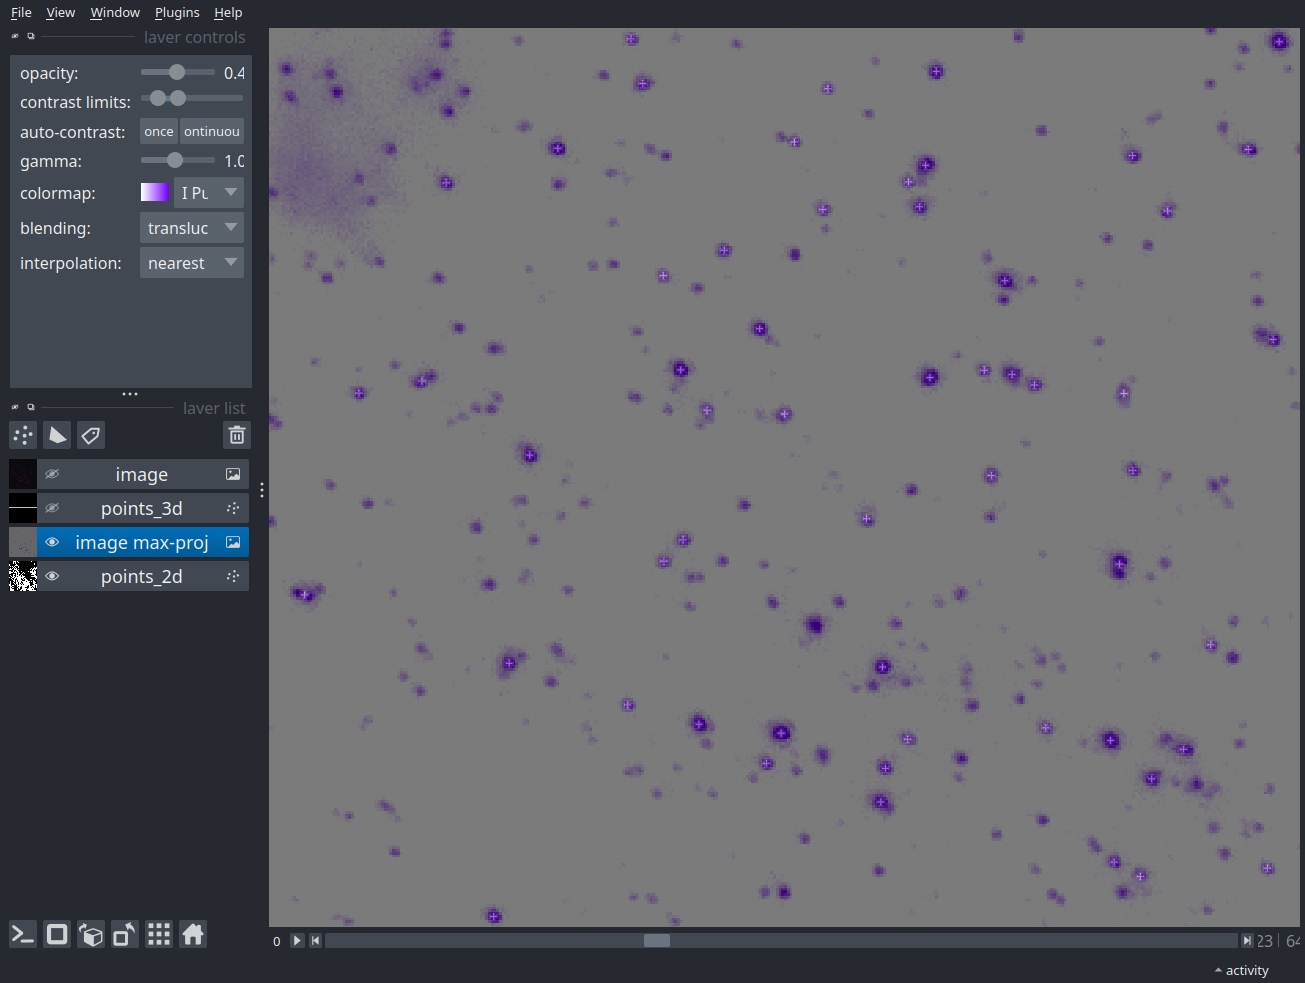

In [23]:
# takes snapshot for 2D projections

napari.utils.nbscreenshot(viewer)

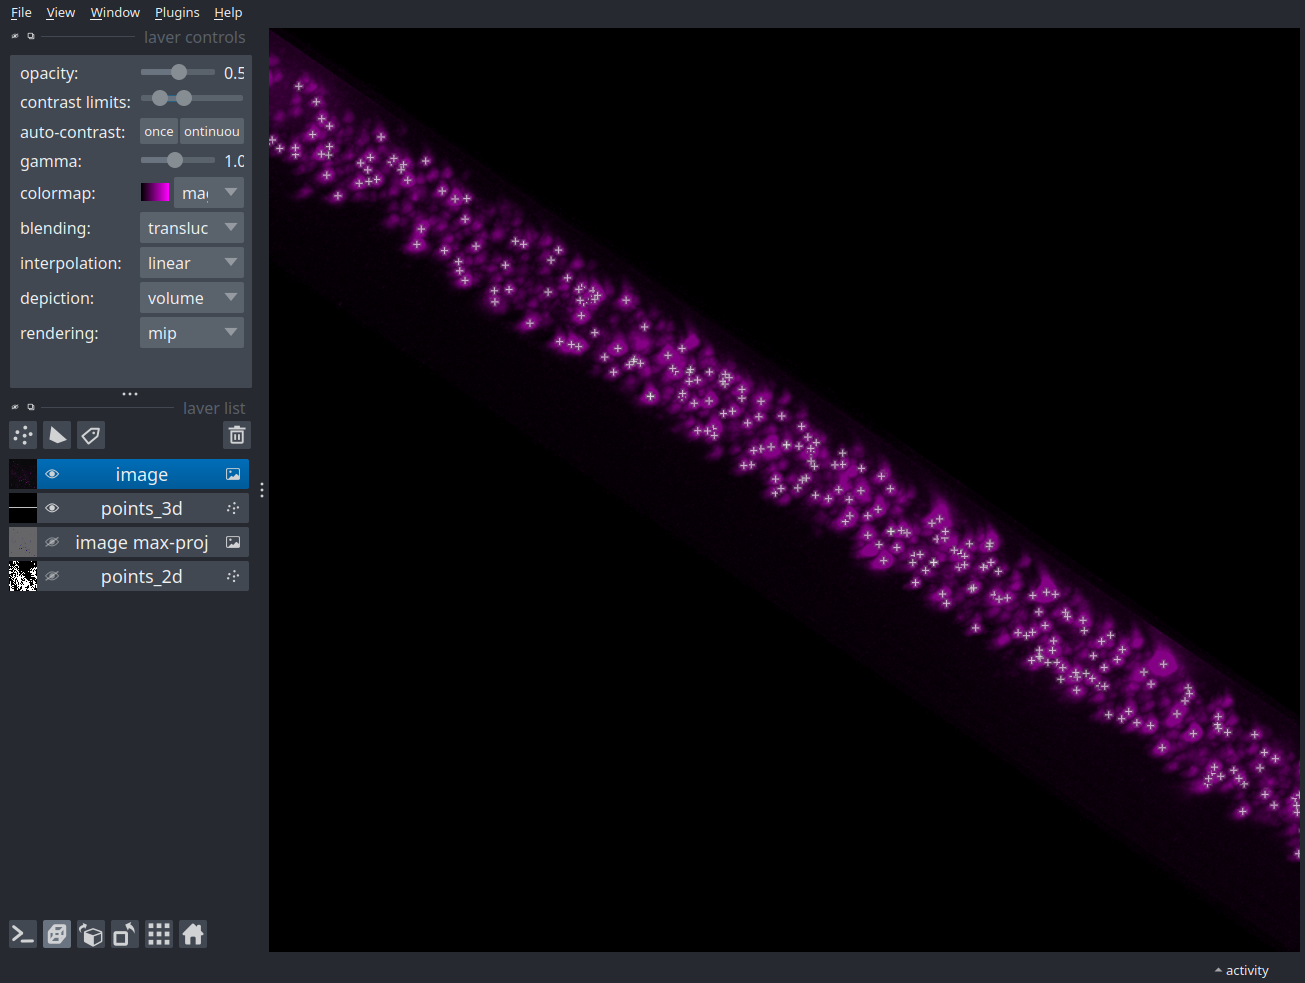

In [24]:
# takes snapshot for 3D projections

napari.utils.nbscreenshot(viewer)


### Summary of results

Clearly many spots are not found !

When we use a colormap it seems to be missing the weak spots.

The image I run pyHiM on was deconvolved using dw, but perhaps the results are different with the raw image? 
- I wonder how the weak spots are looking there...


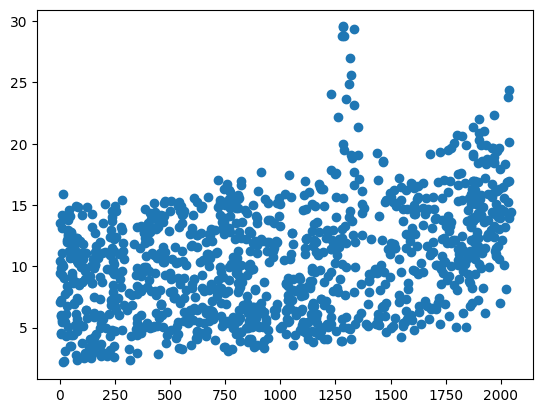

In [9]:
# inspects localization table

%matplotlib inline

points.shape
image.shape

import matplotlib.pyplot as plt

plt.plot(xcentroid,zcentroid,'o')
